Using numpy backend.
Using numpy backend.


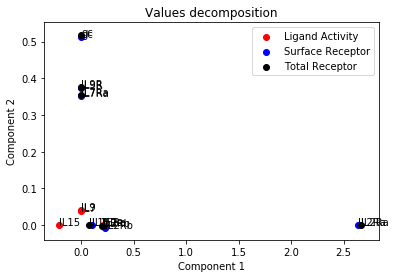

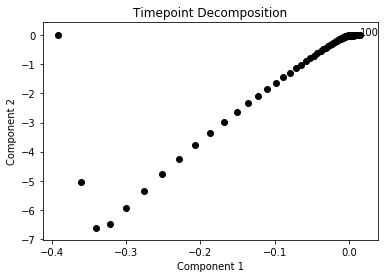

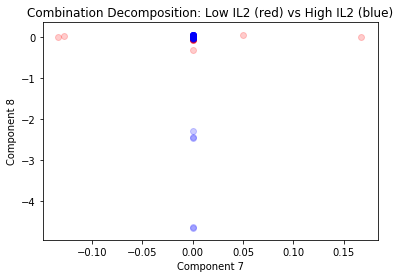

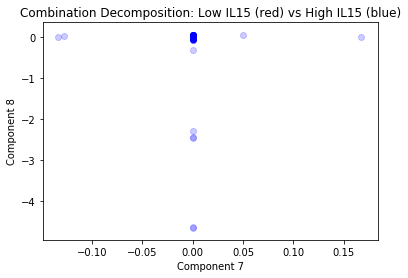

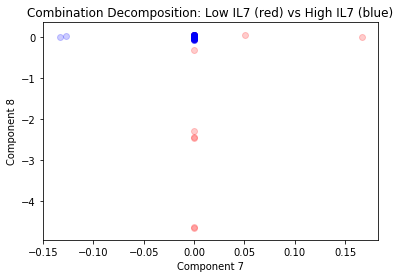

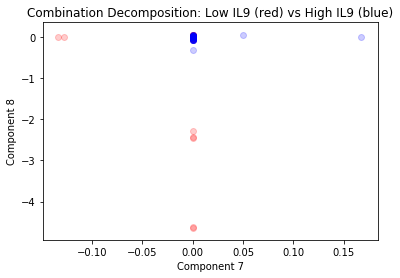

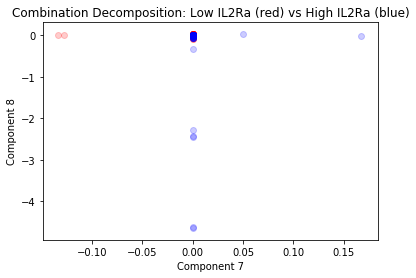

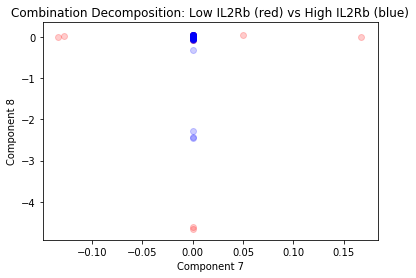

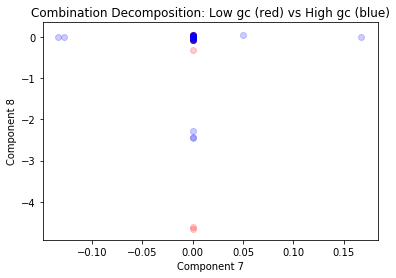

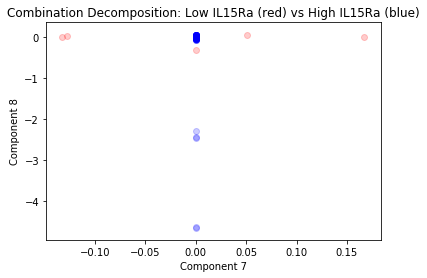

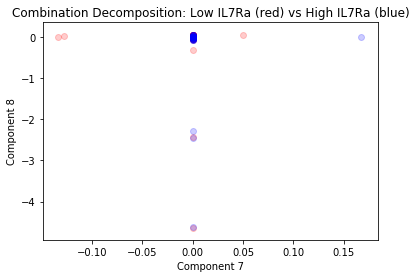

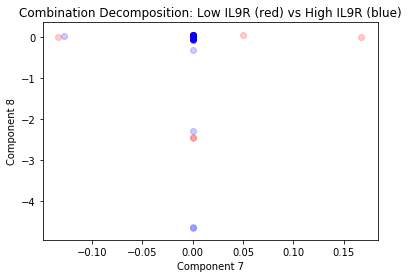

In [1]:
from ckine import Tensor_analysis 
%matplotlib inline

#Actually Apply these functions and see the plots
factors = Tensor_analysis.perform_decomposition(Tensor_analysis.values , 8)
Tensor_analysis.plot_values_decomposition(factors,1,2);
Tensor_analysis.plot_timepoint_decomp(factors,1,2);
Tensor_analysis.plot_combo_decomp(factors, Tensor_analysis.mat, 7, 8);

In [2]:
Tensor_analysis.values.shape
print(Tensor_analysis.values[100][0])
print(Tensor_analysis.mat.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(1024, 10)


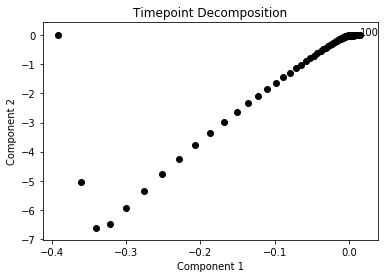

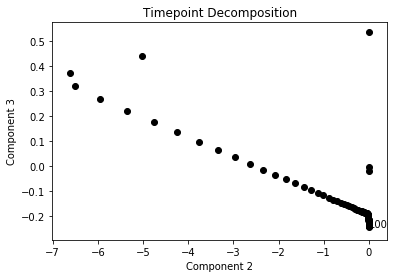

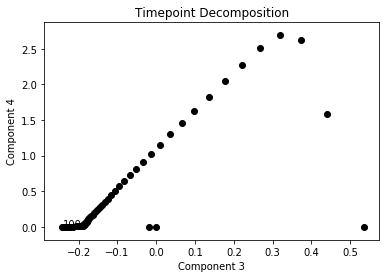

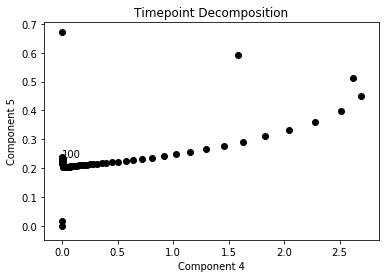

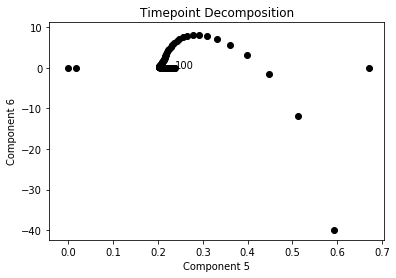

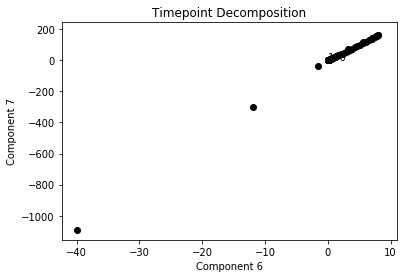

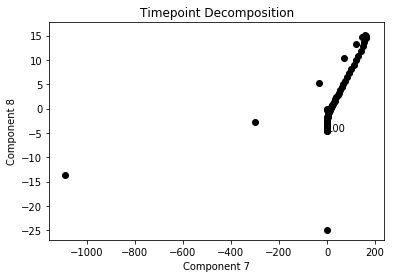

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(1,8):
    Tensor_analysis.plot_timepoint_decomp(factors,i,i+1);


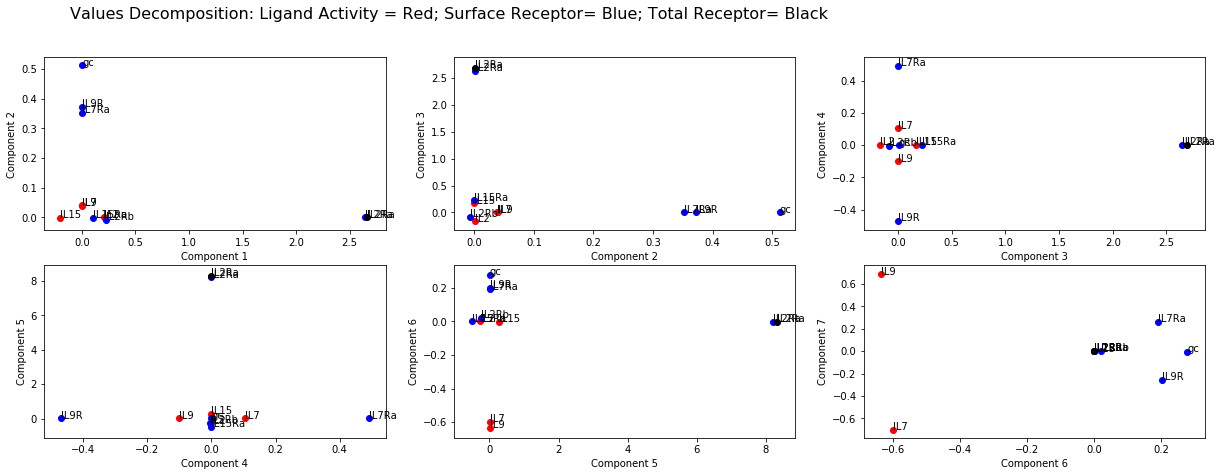

In [4]:
#Generate a plot for component 1 vs component 2 of the factors[2] above representing our values
labels = ['IL2', 'IL15', 'IL7', 'IL9', 'IL2Ra', 'IL2Rb', 'gc', 'IL15Ra', 'IL7Ra', 'IL9R', 'IL2Ra', 'IL2Rb', 'gc', 'IL15Ra', 'IL7Ra', 'IL9R']
#fig = plt.figure()

fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (15,7))
fig.suptitle("Values Decomposition: Ligand Activity = Red; Surface Receptor= Blue; Total Receptor= Black", fontsize=16)
plt.subplots_adjust(left=None, bottom=None, right=1.2, top=None,
                wspace=None, hspace=None)

#Set Active to color red
#Set Surface to color blue
# Set Total to color black

component_x = 0
component_y = 1

for row in ax:
    for col in row: 
        component_x += 1
        component_y += 1
        col.set_xlabel('Component ' + str(component_x))
        col.set_ylabel('Component ' + str(component_y))
       
        for i in range(len(factors[2])):
            if i in range(4):
                c = 'r'
                col.scatter(factors[2][:,component_x - 1][i], factors[2][:,component_y - 1][i], color = c, label = 'Ligand Activity')
                col.annotate(labels[i], xy=(factors[2][:,component_x - 1][i], factors[2][:,component_y - 1][i]), xytext = (0, 0), textcoords = 'offset points')
            elif i in range(4,10):
                c = 'b'
                col.scatter(factors[2][:,component_x - 1][i], factors[2][:,component_y - 1][i], color = c, label = 'Surface Receptor')
                col.annotate(labels[i], xy=(factors[2][:,component_x - 1][i], factors[2][:,component_y - 1][i]), xytext = (0, 0), textcoords = 'offset points')
            else:
                c = 'k'
            if i==10:
                col.scatter(factors[2][:,component_x - 1][i], factors[2][:,component_y - 1][i], color = c, label = 'Total Receptor')
                col.annotate(labels[i], xy=(factors[2][:,component_x - 1][i], factors[2][:,component_y - 1][i]), xytext = (0, 0), textcoords = 'offset points')

        

In [5]:
print(y_of_combos)

NameError: name 'y_of_combos' is not defined

In [ ]:
from ckine import Tensor_analysis 

Tensor_analysis.values.shape
print(Tensor_analysis.values[10][0])
print(Tensor_analysis.mat.shape)

In [ ]:
print(y_of_combos)

In [6]:
from ckine import tensor_generation

y_of_combos, mat = tensor_generation.findy(2,2);


  2%|▏         | 25/1024 [00:00<00:15, 65.39it/s] 

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
1
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
2
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
3


  3%|▎         | 30/1024 [00:00<00:18, 53.00it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
4
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
5
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
6


  4%|▎         | 38/1024 [00:00<00:22, 43.15it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
7
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
8
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
9
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expressi

  4%|▍         | 42/1024 [00:01<00:26, 36.41it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
13
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
14
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
15


  4%|▍         | 45/1024 [00:01<00:29, 33.12it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
16
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
17
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
18


  5%|▌         | 52/1024 [00:01<00:31, 30.46it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
19
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
20
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
21
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expre

  6%|▌         | 58/1024 [00:01<00:32, 29.71it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
24
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
25
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
26


  6%|▌         | 61/1024 [00:02<00:33, 28.49it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
27
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
28


  6%|▋         | 64/1024 [00:02<00:39, 24.21it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
29
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
30
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
31
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

  7%|▋         | 68/1024 [00:03<00:43, 21.77it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
33
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
34


  7%|▋         | 74/1024 [00:03<00:46, 20.64it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
35
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
36
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
37
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expre

  7%|▋         | 76/1024 [00:03<00:46, 20.56it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
39
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
40
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
41


  8%|▊         | 82/1024 [00:44<08:31,  1.84it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
42
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
43
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
44
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

  9%|▊         | 88/1024 [00:44<07:57,  1.96it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
49
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
50
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
51
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expr

  9%|▉         | 92/1024 [00:45<07:37,  2.04it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
53
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
54
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
55


  9%|▉         | 96/1024 [01:26<13:58,  1.11it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
56
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
57
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
58
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 10%|▉         | 100/1024 [01:26<13:22,  1.15it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
60
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
61
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
62


 10%|█         | 104/1024 [01:27<12:50,  1.19it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
63
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
64
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
65
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expr

 10%|█         | 107/1024 [01:27<12:27,  1.23it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
68
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
69
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
70


 11%|█         | 112/1024 [01:27<11:53,  1.28it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
71
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
72
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
73
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 12%|█▏        | 118/1024 [01:27<11:14,  1.34it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
75
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
76
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
77
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expres

 12%|█▏        | 121/1024 [01:28<10:57,  1.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
79
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
80
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
81
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expre

 12%|█▏        | 126/1024 [01:28<10:30,  1.43it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
83
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
84
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
85


 12%|█▎        | 128/1024 [01:28<10:20,  1.44it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
86
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
87
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
88
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 14%|█▎        | 140/1024 [01:28<09:21,  1.57it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
91
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
92
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
93


 14%|█▍        | 147/1024 [01:29<08:53,  1.64it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
94
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
95
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
96


 15%|█▍        | 151/1024 [01:29<08:37,  1.69it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
97
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
98
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
99


 15%|█▌        | 154/1024 [01:29<08:26,  1.72it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
100
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
101
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
102


 15%|█▌        | 157/1024 [01:29<08:16,  1.75it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
103


 16%|█▌        | 160/1024 [01:30<08:08,  1.77it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
104
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
105
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
106


 16%|█▋        | 167/1024 [01:30<07:44,  1.84it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
107
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
108
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
109
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expr

 17%|█▋        | 171/1024 [01:30<07:32,  1.88it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
112
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
113


 17%|█▋        | 176/1024 [01:31<07:19,  1.93it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
114
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
115
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
116
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 18%|█▊        | 183/1024 [01:31<07:00,  2.00it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
119
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
120
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
121


 18%|█▊        | 186/1024 [01:31<06:52,  2.03it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
122
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
123
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
124


 18%|█▊        | 189/1024 [01:31<06:45,  2.06it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
125


 19%|█▉        | 192/1024 [01:32<06:40,  2.08it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
126
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
127
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
128
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 19%|█▉        | 199/1024 [01:32<06:23,  2.15it/s]

.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
129
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
130
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
131
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev:

 20%|█▉        | 202/1024 [01:32<06:17,  2.18it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
134
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
135
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
136
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 20%|██        | 205/1024 [01:32<06:10,  2.21it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
138
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
139
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
140
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 21%|██        | 215/1024 [01:33<05:50,  2.31it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
142
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
143
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
144
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 21%|██▏       | 219/1024 [01:33<05:44,  2.34it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
151
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
152


 22%|██▏       | 222/1024 [01:33<05:39,  2.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
153
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
154
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
155
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 22%|██▏       | 230/1024 [01:34<05:24,  2.44it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
157
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
158
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
159
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 23%|██▎       | 233/1024 [01:34<05:20,  2.47it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
164


 23%|██▎       | 236/1024 [01:34<05:16,  2.49it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
165
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
166
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
167


 24%|██▎       | 243/1024 [01:35<05:05,  2.55it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
168
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
169
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
170
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 24%|██▍       | 246/1024 [01:39<05:14,  2.47it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
173
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
174
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
175


 25%|██▍       | 251/1024 [01:39<05:07,  2.52it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
176
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
177
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
178
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 25%|██▍       | 253/1024 [01:39<05:04,  2.53it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
180
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
181


 25%|██▌       | 257/1024 [01:40<04:59,  2.56it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
182
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
183
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
184
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 26%|██▌       | 265/1024 [01:40<04:47,  2.64it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
186
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
187
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
188


 27%|██▋       | 273/1024 [01:40<04:37,  2.71it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
189
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
190
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
191


 27%|██▋       | 276/1024 [01:40<04:33,  2.73it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
192
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
193
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
194
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 28%|██▊       | 282/1024 [01:41<04:26,  2.78it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
196
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
197


 28%|██▊       | 285/1024 [01:41<04:23,  2.81it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
198
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
199
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
200


 28%|██▊       | 291/1024 [01:41<04:16,  2.86it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
201
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
202
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
203
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 29%|██▉       | 297/1024 [01:42<04:09,  2.91it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
205
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
206
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
207
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 29%|██▉       | 300/1024 [01:42<04:06,  2.93it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
209
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
210


 29%|██▉       | 302/1024 [01:42<04:05,  2.94it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
211
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
212
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
213


 30%|███       | 308/1024 [01:42<03:59,  2.99it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
214
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
215
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
216
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 30%|███       | 311/1024 [01:43<03:56,  3.02it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
220
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
221


 31%|███       | 316/1024 [01:43<03:51,  3.05it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
222
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
223
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
224


 31%|███       | 318/1024 [01:43<03:50,  3.07it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
225
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
226
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
227


 31%|███▏      | 320/1024 [01:43<03:48,  3.08it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
228
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
229


 32%|███▏      | 326/1024 [01:44<03:43,  3.12it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
230
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
231
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
232
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 32%|███▏      | 331/1024 [01:44<03:39,  3.16it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
234
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
235
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
236
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 33%|███▎      | 333/1024 [01:45<03:38,  3.16it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
238
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
239
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
240


 33%|███▎      | 337/1024 [01:45<03:35,  3.19it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
241
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
242
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
243
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 33%|███▎      | 342/1024 [01:45<03:31,  3.23it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
245
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
246
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
247
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 34%|███▍      | 346/1024 [01:46<03:28,  3.26it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
249
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
250


 34%|███▍      | 348/1024 [01:46<03:26,  3.27it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
251
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
252


 34%|███▍      | 352/1024 [01:46<03:23,  3.30it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
253
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
254
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
255
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 35%|███▌      | 360/1024 [01:47<03:17,  3.36it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
260
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
261
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
262
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 36%|███▌      | 364/1024 [01:47<03:15,  3.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
264
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
265
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
266
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 36%|███▌      | 368/1024 [01:48<03:12,  3.40it/s]

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
267
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
268
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
269
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
270
Model run failed
Endocytosis: 0.05
activeEndo: 

 36%|███▋      | 372/1024 [01:48<03:09,  3.44it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
272
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
273
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
274


 37%|███▋      | 376/1024 [01:48<03:07,  3.46it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
275
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
276
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
277
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 37%|███▋      | 378/1024 [01:49<03:06,  3.47it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
279
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
280


 37%|███▋      | 382/1024 [01:49<03:03,  3.49it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
281
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
282
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
283
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 38%|███▊      | 384/1024 [01:49<03:02,  3.50it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
285
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
286


 38%|███▊      | 391/1024 [01:50<02:58,  3.55it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
287
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
288
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
289
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 38%|███▊      | 393/1024 [01:50<02:57,  3.55it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
291
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
292


 39%|███▉      | 398/1024 [01:51<02:55,  3.57it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
293
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
294


 39%|███▉      | 404/1024 [01:51<02:51,  3.61it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
295
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
296
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
297
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 40%|███▉      | 406/1024 [01:51<02:50,  3.63it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
299
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
300
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
301


 40%|████      | 411/1024 [02:35<03:51,  2.64it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
302
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
303
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
304


 40%|████      | 412/1024 [02:35<03:51,  2.65it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
305
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
306


 40%|████      | 414/1024 [02:35<03:49,  2.66it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
307
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
308


 41%|████      | 416/1024 [02:35<03:47,  2.67it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
309
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
310
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
311


 41%|████▏     | 423/1024 [02:36<03:42,  2.70it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
312
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
313
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
314
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 42%|████▏     | 427/1024 [02:37<03:39,  2.72it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
316
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
317
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
318


 42%|████▏     | 429/1024 [02:37<03:38,  2.73it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
319


 42%|████▏     | 434/1024 [02:37<03:34,  2.75it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
320
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
321
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
322


 43%|████▎     | 438/1024 [02:38<03:31,  2.77it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
323
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
324
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
325


 43%|████▎     | 443/1024 [02:39<03:29,  2.78it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
326
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
327
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
328


 43%|████▎     | 445/1024 [02:39<03:27,  2.79it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
329
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
330


 44%|████▍     | 449/1024 [02:39<03:24,  2.81it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
331
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
332
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
333
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 44%|████▍     | 455/1024 [02:40<03:20,  2.84it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
336
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
337
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
338
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 45%|████▍     | 460/1024 [02:40<03:16,  2.87it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
340
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
341
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
342


 45%|████▌     | 464/1024 [02:40<03:14,  2.89it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
343
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
344
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
345
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 46%|████▌     | 471/1024 [02:41<03:09,  2.92it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
347
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
348
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
349
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 46%|████▋     | 476/1024 [02:41<03:06,  2.94it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
353
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
354
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
355
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 47%|████▋     | 478/1024 [02:42<03:05,  2.95it/s]

IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
356
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
357


 48%|████▊     | 487/1024 [02:42<02:59,  3.00it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
358
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
359
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
360
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 48%|████▊     | 492/1024 [02:42<02:56,  3.02it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
365
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
366
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
367
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 48%|████▊     | 494/1024 [02:43<02:54,  3.03it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
369
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]


 48%|████▊     | 496/1024 [02:43<02:53,  3.04it/s]

.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
370
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
371
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
372


 49%|████▉     | 503/1024 [02:47<02:53,  3.00it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
373
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
374
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
375
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 50%|████▉     | 508/1024 [02:47<02:50,  3.03it/s]

IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
378
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
379
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
380


 50%|████▉     | 511/1024 [02:48<02:48,  3.04it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
381
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
382
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
383


 51%|█████     | 522/1024 [02:48<02:41,  3.10it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e+02 1.e-03]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
384
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
385
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
386
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 52%|█████▏    | 529/1024 [02:48<02:37,  3.13it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
389
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
390
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
391
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 52%|█████▏    | 536/1024 [02:49<02:33,  3.17it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
393
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
394
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
395
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 53%|█████▎    | 539/1024 [02:49<02:32,  3.18it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
397
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
398
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
399


 53%|█████▎    | 542/1024 [02:49<02:30,  3.20it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
400
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
401
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
402


 54%|█████▎    | 549/1024 [02:49<02:26,  3.23it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
403
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
404
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
405
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 54%|█████▍    | 555/1024 [02:50<02:23,  3.26it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
408
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
409
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
410
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 54%|█████▍    | 558/1024 [02:50<02:22,  3.28it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
413
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
414
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
415


 55%|█████▍    | 561/1024 [02:50<02:20,  3.29it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
416
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
417
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
418
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 55%|█████▌    | 567/1024 [02:50<02:17,  3.32it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
420
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
421
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
422


 56%|█████▌    | 570/1024 [02:51<02:16,  3.33it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
423
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
424


 56%|█████▌    | 572/1024 [02:51<02:15,  3.34it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
425
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
426
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
427


 56%|█████▋    | 576/1024 [02:51<02:13,  3.36it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
428
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
429
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
430
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 57%|█████▋    | 582/1024 [02:52<02:11,  3.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
434


 57%|█████▋    | 586/1024 [02:53<02:09,  3.38it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
435
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
436
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
437
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 58%|█████▊    | 590/1024 [02:53<02:07,  3.40it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
439
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
440
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
441


 58%|█████▊    | 592/1024 [02:53<02:06,  3.41it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
442
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
443
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
444
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 59%|█████▊    | 600/1024 [02:54<02:02,  3.45it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
447
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
448
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
449
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 59%|█████▉    | 603/1024 [02:54<02:01,  3.46it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
452
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
453
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
454


 59%|█████▉    | 609/1024 [02:54<01:59,  3.49it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
455
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
456
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
457
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 60%|██████    | 616/1024 [02:55<01:56,  3.51it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
462
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
463
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
464
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 61%|██████    | 620/1024 [02:55<01:54,  3.53it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
466
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
467
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
468


 61%|██████    | 622/1024 [02:55<01:53,  3.54it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
469
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
470
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
471


 61%|██████▏   | 628/1024 [02:56<01:51,  3.57it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
472
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
473
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
474
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 62%|██████▏   | 633/1024 [02:56<01:48,  3.59it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
477
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
478
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
479
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 62%|██████▏   | 636/1024 [02:56<01:47,  3.60it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
482
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
483
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
484


 62%|██████▎   | 640/1024 [02:56<01:46,  3.62it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
485
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
486
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
487
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 63%|██████▎   | 644/1024 [02:57<01:44,  3.63it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
489
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
490


 63%|██████▎   | 650/1024 [02:57<01:42,  3.65it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
491
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
492
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
493


 64%|██████▎   | 652/1024 [02:58<01:41,  3.66it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
494
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
495


 64%|██████▍   | 654/1024 [02:58<01:40,  3.67it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
496
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
497


 64%|██████▍   | 656/1024 [02:58<01:40,  3.67it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
498
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
499
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
500


 65%|██████▍   | 664/1024 [03:05<01:40,  3.58it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
501
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
502
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
503


 65%|██████▌   | 667/1024 [03:05<01:39,  3.60it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
504
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
505
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
506


 65%|██████▌   | 669/1024 [03:05<01:38,  3.61it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
507
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
508


 66%|██████▌   | 673/1024 [03:05<01:36,  3.62it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
509
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
510
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
511
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 66%|██████▋   | 679/1024 [03:06<01:34,  3.64it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
513
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
514
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
515


 67%|██████▋   | 682/1024 [03:06<01:33,  3.65it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
516
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
517
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
518


 67%|██████▋   | 686/1024 [03:07<01:32,  3.66it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
519
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
520
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
521


 67%|██████▋   | 688/1024 [03:07<01:31,  3.67it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
522
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
523
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
524


 68%|██████▊   | 697/1024 [03:08<01:28,  3.71it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
525
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
526
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
527
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 68%|██████▊   | 700/1024 [03:09<01:27,  3.70it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
531
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
532


 69%|██████▉   | 704/1024 [03:09<01:26,  3.71it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
533
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
534
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
535
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 70%|██████▉   | 712/1024 [03:10<01:23,  3.75it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
538
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
539
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
540
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 70%|██████▉   | 714/1024 [03:10<01:22,  3.75it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
542
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
543


 70%|██████▉   | 716/1024 [03:10<01:22,  3.75it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
544
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
545


 70%|███████   | 720/1024 [03:11<01:20,  3.76it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
546
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
547
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
548


 71%|███████   | 725/1024 [03:11<01:19,  3.78it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
549
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
550


 71%|███████   | 729/1024 [03:12<01:17,  3.80it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
551
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
552
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
553
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 71%|███████▏  | 731/1024 [03:12<01:17,  3.79it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
555
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
556
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
557
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 72%|███████▏  | 737/1024 [03:13<01:15,  3.82it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
560
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
561
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
562


 73%|███████▎  | 743/1024 [03:13<01:13,  3.84it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
563
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
564
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
565
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 73%|███████▎  | 749/1024 [03:13<01:11,  3.87it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
568
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
569
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
570
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 74%|███████▍  | 756/1024 [03:14<01:08,  3.90it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
572
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
573
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
574


 74%|███████▍  | 759/1024 [03:14<01:07,  3.91it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
575
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
576
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
577


 75%|███████▍  | 765/1024 [03:14<01:05,  3.93it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
578
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
579
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
580
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 75%|███████▌  | 768/1024 [03:14<01:04,  3.94it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
584
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e+02 1.e-03 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
585
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
586


 76%|███████▌  | 777/1024 [03:15<01:02,  3.98it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
587
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
588
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
589
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 76%|███████▌  | 780/1024 [03:15<01:01,  3.99it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
591
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
592
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
593
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 77%|███████▋  | 784/1024 [03:15<00:59,  4.01it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
595
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
596
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
597


 77%|███████▋  | 791/1024 [03:15<00:57,  4.04it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
598
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
599
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
600
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 78%|███████▊  | 794/1024 [03:16<00:56,  4.05it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
602
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
603
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
604


 78%|███████▊  | 796/1024 [03:16<00:56,  4.05it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
605
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
606
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
607


 78%|███████▊  | 800/1024 [03:16<00:55,  4.07it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
608
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
609
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
610
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 79%|███████▉  | 807/1024 [03:16<00:52,  4.10it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
612
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
613
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
614
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expr

 79%|███████▉  | 810/1024 [03:17<00:52,  4.11it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
617
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
618
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
619
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 79%|███████▉  | 813/1024 [03:17<00:51,  4.12it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
622
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
623


 80%|███████▉  | 817/1024 [03:17<00:50,  4.13it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
624
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
625
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
626
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 80%|████████  | 824/1024 [03:17<00:48,  4.16it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
628
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
629
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
630
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 81%|████████  | 829/1024 [03:18<00:46,  4.18it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
634
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
635
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
636
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 81%|████████▏ | 834/1024 [03:18<00:45,  4.20it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
638
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
639
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
640
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 82%|████████▏ | 838/1024 [03:18<00:44,  4.22it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
642
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
643
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
644
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 82%|████████▏ | 841/1024 [03:18<00:43,  4.23it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
646
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
647
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
648


 82%|████████▏ | 844/1024 [03:19<00:42,  4.24it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
649
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
650
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
651


 83%|████████▎ | 848/1024 [03:19<00:41,  4.25it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
652
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
653
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
654
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Recepto

 83%|████████▎ | 853/1024 [03:19<00:40,  4.27it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
656
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
657
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
658
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expr

 84%|████████▎ | 856/1024 [03:19<00:39,  4.28it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
660
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
661
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
662


 84%|████████▍ | 859/1024 [03:20<00:38,  4.29it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
663
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
664
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
665


 84%|████████▍ | 863/1024 [03:20<00:37,  4.31it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
666
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
667
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
668
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 85%|████████▍ | 866/1024 [03:20<00:36,  4.32it/s]

IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
669
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
670
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
671
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0

 85%|████████▌ | 872/1024 [03:20<00:35,  4.34it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
674
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
675
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
676
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 86%|████████▌ | 876/1024 [03:21<00:33,  4.35it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
678
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
679
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
680
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 86%|████████▌ | 882/1024 [03:21<00:32,  4.38it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
682
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
683
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
684
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 86%|████████▋ | 885/1024 [03:21<00:31,  4.39it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
686
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
687
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
688
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor exp

 87%|████████▋ | 890/1024 [03:22<00:30,  4.41it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
690
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
691
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
692


 87%|████████▋ | 892/1024 [03:22<00:29,  4.41it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
693
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
694
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
695
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 88%|████████▊ | 896/1024 [03:22<00:28,  4.43it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e+02 1.e-03 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
698
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
699


 88%|████████▊ | 900/1024 [03:22<00:27,  4.44it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
700
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
701


 88%|████████▊ | 902/1024 [03:23<00:27,  4.44it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
702
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
703


 88%|████████▊ | 904/1024 [03:23<00:26,  4.45it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
704
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
705


 89%|████████▊ | 908/1024 [03:23<00:26,  4.46it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
706
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
707
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
708
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 89%|████████▉ | 911/1024 [03:23<00:25,  4.47it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
711


 89%|████████▉ | 913/1024 [03:24<00:24,  4.47it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
712
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
713
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
714


 89%|████████▉ | 916/1024 [03:30<00:24,  4.36it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
715


 90%|████████▉ | 920/1024 [03:31<00:23,  4.36it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
716
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
717
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
718
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 90%|█████████ | 923/1024 [03:31<00:23,  4.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
721


 90%|█████████ | 924/1024 [06:57<00:45,  2.21it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
722
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
723


 90%|█████████ | 926/1024 [06:57<00:44,  2.22it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
724
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
725


 91%|█████████ | 933/1024 [06:57<00:40,  2.23it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
726
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
727
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
728
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 92%|█████████▏| 937/1024 [06:58<00:38,  2.24it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
732
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
733
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
734
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 92%|█████████▏| 939/1024 [06:58<00:37,  2.24it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
736
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
737


 92%|█████████▏| 941/1024 [06:58<00:36,  2.25it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
738
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....

 92%|█████████▏| 947/1024 [06:58<00:34,  2.26it/s]


IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
739
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
740
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
741
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0

 93%|█████████▎| 950/1024 [06:58<00:32,  2.27it/s]

kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
743
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
744
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
745


 93%|█████████▎| 955/1024 [07:00<00:30,  2.27it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
746
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
747
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
748
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 94%|█████████▎| 959/1024 [07:00<00:28,  2.28it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
750
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
751
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
752


 94%|█████████▍| 966/1024 [07:00<00:25,  2.30it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e+02 1.e-03 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
753
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
754
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
755
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 95%|█████████▍| 968/1024 [07:00<00:24,  2.30it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
758
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
759
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
760


 95%|█████████▍| 972/1024 [07:01<00:22,  2.31it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
761
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
762
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
763
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 95%|█████████▌| 975/1024 [07:01<00:21,  2.31it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
766
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
767
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
768
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 96%|█████████▌| 980/1024 [07:01<00:18,  2.32it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
770
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
771


 96%|█████████▌| 984/1024 [07:02<00:17,  2.33it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
772
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
773
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
774
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 96%|█████████▋| 988/1024 [07:02<00:15,  2.34it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
776
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
777
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
778
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor e

 97%|█████████▋| 991/1024 [07:02<00:14,  2.34it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
781


 97%|█████████▋| 998/1024 [07:03<00:11,  2.36it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e+02 1.e-03 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
782
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
783
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
784
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 98%|█████████▊| 1002/1024 [07:03<00:09,  2.36it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
789
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
790
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
791
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor ex

 98%|█████████▊| 1007/1024 [07:04<00:07,  2.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
793
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
794
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
795
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor 

 99%|█████████▊| 1009/1024 [07:04<00:06,  2.38it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [1.e-03 1.e+02 1.e+02 1.e+02 1.e+02 1.e+02]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
797
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
798
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
799


 99%|█████████▉| 1015/1024 [07:08<00:03,  2.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
800
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
801
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
802


 99%|█████████▉| 1017/1024 [07:08<00:02,  2.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 0.001
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
803
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
804


100%|█████████▉| 1019/1024 [07:09<00:02,  2.37it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
805
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 1000.0
IL15: 0.001
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
806


100%|█████████▉| 1023/1024 [07:10<00:00,  2.38it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 0.001
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
807
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 0.001
IL15: 0.001
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
808
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 0.001
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
809
Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100

100%|██████████| 1024/1024 [07:10<00:00,  2.38it/s]

Model run failed
Endocytosis: 0.05
activeEndo: 0.05
sortF: 0.05
kRec: 0.05
kDeg: 0.05
Receptor expression: [100. 100. 100. 100. 100. 100.]
.....Reaction rates.....
IL2: 1000.0
IL15: 1000.0
IL7: 1000.0
IL9: 1000.0
kfwd: 0.5
k5rev: 0.5
k6rev: 0.5
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
811
